In [9]:
import os
import pandas as pd

In [4]:
df = pd.read_csv("verified.txt", names=["evt_id","sta", "Tp", 
                                                   "p_len","TsPmP", "sPmP_len",
                                                   "TsPn", "sPn_len", "quality", "evt_num"], header = None)

In [5]:
df

,evt_id,sta,Tp,p_len,TsPmP,sPmP_len,TsPn,sPn_len,quality,evt_num
0,39909423,CI.HOL.,15.558,0.3,18.173,0.3,nan,0.4,a,NaN
1,39909511,AZ.LVA2.,3.723,0.2,11.662,0.3,nan,0.4,b,NaN
2,39909511,AZ.SMER.,12.748,0.2,16.068,0.3,nan,0.4,b,NaN
3,39909511,BC.RMX.,16.035,0.3,19.083,0.3,18.483,0.3,a,2.022011e+16
4,39909663,CI.EML.,18.840,0.4,23.763,0.4,22.793,0.4,a,2.022011e+16
...,...,...,...,...,...,...,...,...,...,...
96,40180784,CI.IKP.,13.600,0.4,15.700,0.4,nan,0.3,c,2.022021e+16
97,40182952,CI.SRT.,4.950,0.4,11.700,0.4,nan,0.3,c,2.022021e+16
98,40183048,CI.SRT.,4.920,0.4,12.000,0.4,nan,0.3,b,2.022021e+16
99,40183056,CI.CCA.,15.000,0.4,18.200,0.4,nan,0.3,a,2.022021e+16


In [10]:
(df["Tp"]-df["TsPmP"]).min()

-10.040000000000001

In [5]:
import os

def count_files(directory, extension):
    count = 0
    for root, dirs, files in os.walk(directory):
        #print(root)
        for filename in files:
            #print(filename)
            if filename.endswith(extension):
                
                count += 1
    return count

directory = 'Download/Verified'
extension = '._analyses.pdf'

file_count = count_files(directory, extension)
print(f"Number of files ending with {extension}: {file_count}")

Number of files ending with ._analyses.pdf: 190


In [10]:
os.getcwd()

'/home/youzhi/python-projects/sp-project/verified'

In [52]:
file = "CI.HOL..BHZ.SAC.bp.cut"

In [2]:
from obspy import read

In [53]:
st1 = read(file)

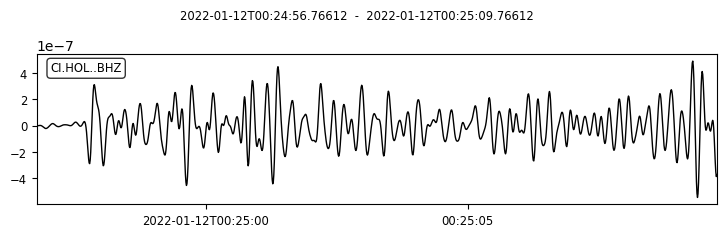

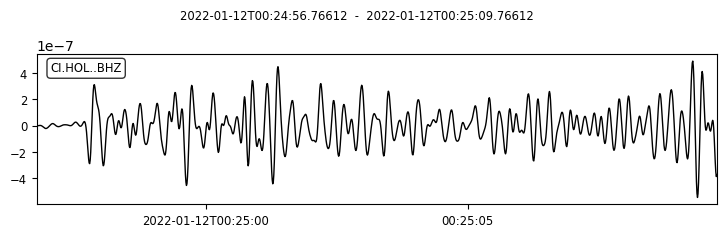

In [54]:
st1.plot()

In [16]:
from obspy.io.sac.util import get_sac_reftime

In [21]:
T = get_sac_reftime(st[0].stats.sac)

In [22]:
st.trim(T-2, T+11)

1 Trace(s) in Stream:
CI.HOL..BHZ | 2022-01-12T00:24:56.766120Z - 2022-01-12T00:25:09.766120Z | 100.0 Hz, 1301 samples

In [25]:
st.stat.sac.o

AttributeError: 'Stream' object has no attribute 'stat'

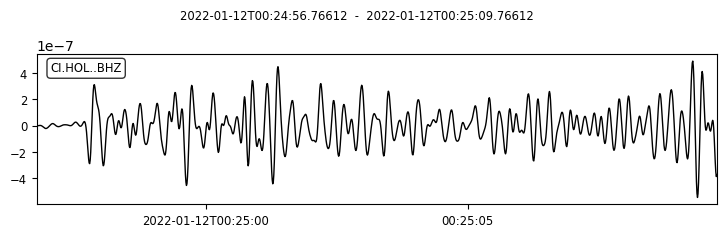

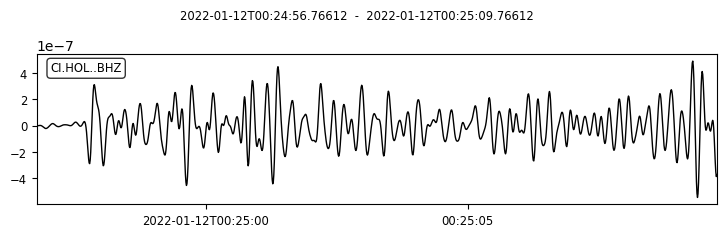

In [23]:
st.plot()

In [47]:
dt = get_sac_reftime(st[0].stats.sac)
dt

2022-01-12T00:24:58.770000Z

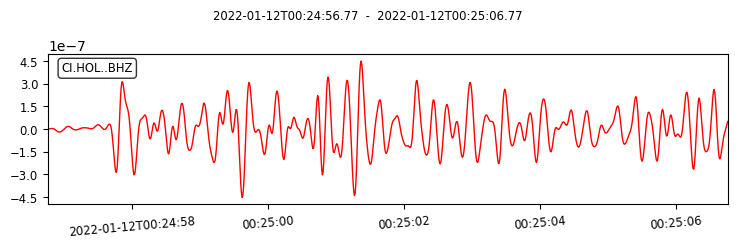

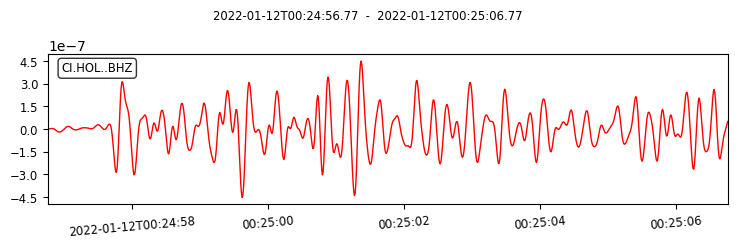

In [51]:
st.plot(color='red', tick_rotation=5, tick_format='%I:%M %p',
                   starttime=dt-2 , endtime=dt + 8)

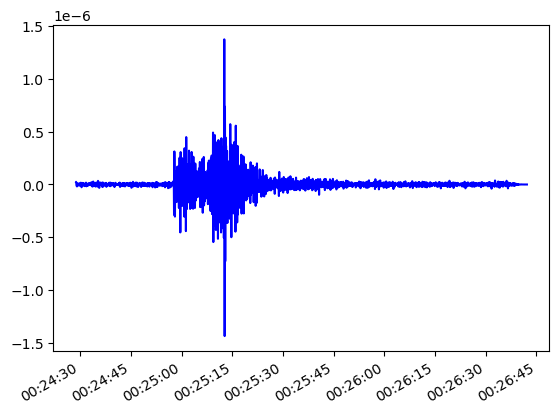

In [38]:
import matplotlib.pyplot as plt


tr = st[0]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(tr.times("matplotlib"), tr.data, "b-")
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()